In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=UserWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
%matplotlib inline

<h3>Data Preparation & Wrangling</h3>

In [3]:
from sklearn import datasets
df = datasets.load_iris() #also from here px.data.iris()

<i><b>df</b> is a .json dataset containing data about features, target, features names, target names, etc. Our task is to read data into .json format and make a dataframe of it so that it will become more readible. Print **df** data into another cell if you want to look inside it.</i>

In [4]:
temp = pd.DataFrame(df['data'],columns = df['feature_names'])
temp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
temp['target'] = df['target']
temp.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
99,5.7,2.8,4.1,1.3,1
49,5.0,3.3,1.4,0.2,0
36,5.5,3.5,1.3,0.2,0
116,6.5,3.0,5.5,1.8,2
102,7.1,3.0,5.9,2.1,2


In [6]:
df['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
temp['target_names'] = temp['target']
temp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [8]:
for i in range(3):
    temp['target_names'] = temp['target_names'].replace({i:df['target_names'][i]})
temp.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
97,6.2,2.9,4.3,1.3,1,versicolor
137,6.4,3.1,5.5,1.8,2,virginica
73,6.1,2.8,4.7,1.2,1,versicolor
70,5.9,3.2,4.8,1.8,1,versicolor
36,5.5,3.5,1.3,0.2,0,setosa
104,6.5,3.0,5.8,2.2,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
83,6.0,2.7,5.1,1.6,1,versicolor
88,5.6,3.0,4.1,1.3,1,versicolor
37,4.9,3.6,1.4,0.1,0,setosa


<h3>Data Splitting</h3>

In [9]:
print('Dataset has {} rows\nDataset has {} columns'.format(temp.shape[0],temp.shape[1]))

Dataset has 150 rows
Dataset has 6 columns


In [10]:
from sklearn.model_selection import train_test_split
features = temp.drop(['target','target_names'],axis=1)              
labels = temp['target']
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,random_state = 10)

<h3>Decision-Tree Algo.</h3>

*A decision-tree algorithm is a **supervised learning** classification algorithm. It is used to make a decision-tree using recursive partioning to classify the data and to select the best predictive characterstics or feature of a dataset. In this dataset, we have four features and this algorith may choose any but best predictive feature to predict the target name. Since our datset contains categorial target variable, the decision-tree will be called as **categorial variable decision-tree**(if variable is continuous, then continuous variable decision-tree).* 

In [11]:
temp.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


<h4>Model Building & Algorithms</h4>

<h4>1. ID3-Algorithm</h4>
<i>It uses Entropy and Information gain for constructing a decision-tree.</i>

**Entropy**: It is the measure of randomness or disorderness in a dataset. To construct an acceptable decision-tree, finding best attributes that can maximize information gain or minimize entropy is the only need. While running ID3 algorithm, it splits the dataset in all possible ways and return the attributes that results maximum information gain or least entropy. The attributes that result maximum information gain leads to the development of decision-tree and the attribute become a *decision-node*. This process will go on for its branches and so on. The entropy decreases with a downward step of a tree and becomes 0 at *leaf node* or it can say that **a branch with entropy 0 is leaf node**. If, at any branch, the entropy isn\'t 0, there the data will split further and this ID3 algo. will recursively continue to run until the attainment of 0 entropy. 

In [12]:
from sklearn.tree import DecisionTreeClassifier
model_ent = DecisionTreeClassifier(criterion='entropy')
model_ent.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
#Visualizing Tree
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import matplotlib.image as mpimg

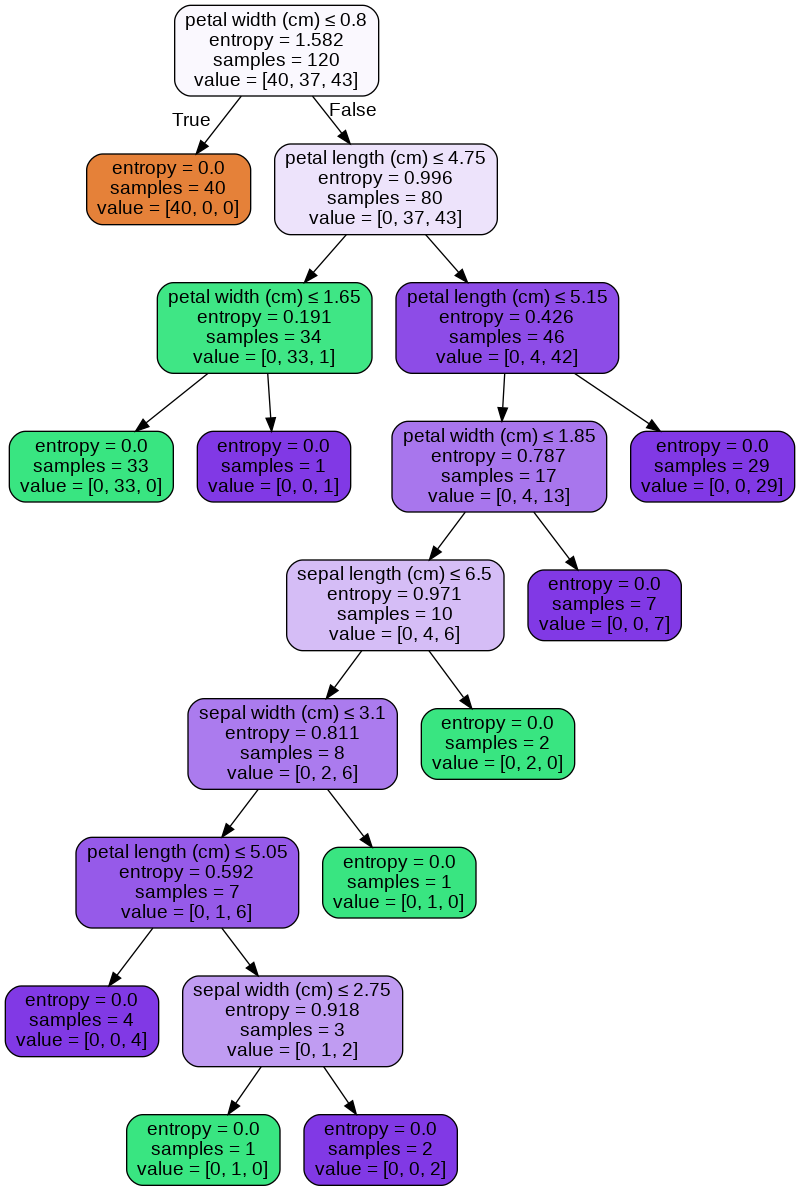

In [14]:
dot_data = StringIO()
export_graphviz(model_ent, out_file=dot_data, feature_names=df['feature_names'],  
                filled=True, rounded=True,
                special_characters=True,rotate=False)
img_ent = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(img_ent.create_png())

<h5>ID3 - Model Evaluation</h5>

In [15]:
y_pred_ent = model_ent.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
print('Accuracy Score of ID3 Algorithm is {:.2f}'.format(accuracy_score(y_test,y_pred_ent)))

Accuracy Score of ID3 Algorithm is 0.97


<h4>2. Gini-index</h4>
<p>Gini uses sum of square of probability of success & failure at each nodes and then its weighted average.</p>
1. ($success^2$ + $failure^2$) at each node <br>
2. weighted average <br>
The splitting of dataset that has high <b>Gini score</b> will be the node splitting.

In [17]:
model_gini = DecisionTreeClassifier(criterion='gini') #default though
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

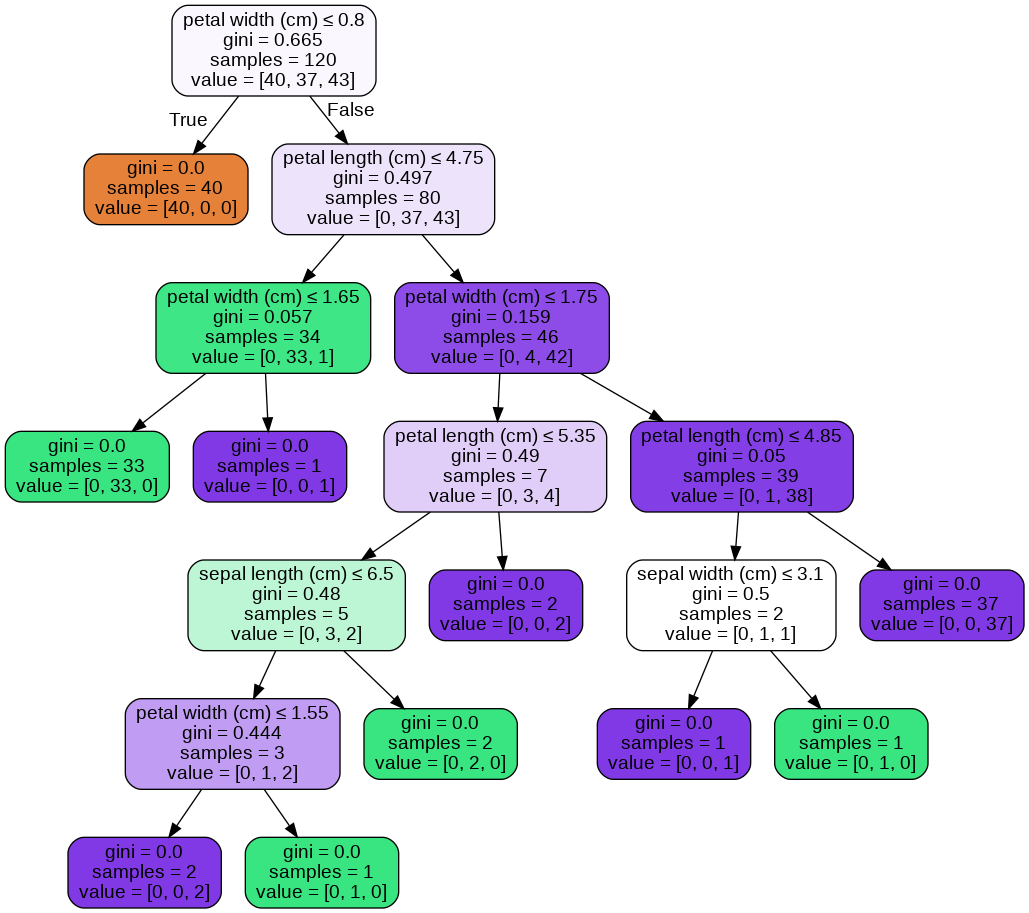

In [18]:
dot_data = StringIO()
export_graphviz(model_gini, out_file=dot_data, feature_names=df['feature_names'],  
                filled=True, rounded=True,
                special_characters=True,rotate=False)
img_gini = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(img_gini.create_png())

<h5>Gini Index - Model Evaluation</h5>

In [22]:
y_pred_gini = model_ent.predict(x_test)
print('Accuracy Score of Gini index is {:.2f}'.format(accuracy_score(y_test,y_pred_gini)))

Accuracy Score of Gini index is 0.97


**Thank You😋**